# UAS Studi Kasus Mobile Price
Model KNN,Naive Bayes,K-Means,Decision Tree dan Random Forest

#Normalisasi Data


In [13]:
import pandas as pd
import numpy as np
data = pd.read_csv('https://raw.githubusercontent.com/rahadis/datamining/main/train.csv')
data.fillna(0,inplace=True)
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [14]:

#fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g', 'm_dep', 'mobile_wt', 'px_height', 'px_width', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
#fd1 = data.drop(columns=['blue', 'dual_sim', 'm_dep', 'mobile_wt', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)
fd1 = data.drop(columns=['blue', 'dual_sim', 'four_g', 'm_dep', 'mobile_wt', 'px_height', 'px_width' , 'talk_time', 'three_g', 'touch_screen', 'wifi', 'price_range'],axis=1)


fd1

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,sc_h,sc_w
0,842,2.2,1,7,2,2,2549,9,7
1,1021,0.5,0,53,3,6,2631,17,3
2,563,0.5,2,41,5,6,2603,11,2
3,615,2.5,0,10,6,9,2769,16,8
4,1821,1.2,13,44,2,14,1411,8,2
...,...,...,...,...,...,...,...,...,...
1995,794,0.5,0,2,6,14,668,13,4
1996,1965,2.6,0,39,4,3,2032,11,10
1997,1911,0.9,1,36,8,3,3057,9,1
1998,1512,0.9,4,46,5,5,869,18,10


In [3]:
y = data['price_range'].values
X= fd1

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=1)
X_train.shape + X_test.shape

(1600, 9, 400, 9)

In [5]:
X_test

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,sc_h,sc_w
674,1034,2.6,2,45,3,4,969,15,1
1699,1002,1.8,1,45,7,7,1234,19,13
1282,609,0.5,4,10,6,6,1905,16,3
1315,1510,0.6,1,32,3,8,854,8,2
1210,805,1.7,0,58,3,10,3397,7,6
...,...,...,...,...,...,...,...,...,...
400,1266,1.9,0,7,3,12,2532,10,5
763,1741,1.8,0,14,8,0,3387,11,3
385,1880,1.8,4,18,3,5,3333,17,15
1667,1967,0.5,0,46,1,7,1567,15,2


## Save Normalisasi Data

In [ ]:
from pathlib import Path  
filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/mobileprice.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X.to_csv(filepath) 

In [6]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(y)
y = le.transform(y)
y

array([1, 2, 2, ..., 3, 0, 3])

In [7]:
y_target = data['price_range']
y = y_target.values.tolist()
print(y[:10])

[1, 2, 2, 2, 1, 1, 3, 0, 0, 0]


In [8]:
y_target

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

#Preprocesing Min-Max

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaled = scaler.fit_transform(X)
nama_fitur = X.columns.copy()
scaled_fitur = pd.DataFrame(scaled,columns=nama_fitur)
scaled_fitur

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram
0,0.227789,0.68,0.052632,0.080645,0.142857,0.10,0.612774
1,0.347361,0.00,0.000000,0.822581,0.285714,0.30,0.634687
2,0.041416,0.00,0.105263,0.629032,0.571429,0.30,0.627205
3,0.076152,0.80,0.000000,0.129032,0.714286,0.45,0.671566
4,0.881764,0.28,0.684211,0.677419,0.142857,0.70,0.308658
...,...,...,...,...,...,...,...
1995,0.195725,0.00,0.000000,0.000000,0.714286,0.70,0.110102
1996,0.977956,0.84,0.000000,0.596774,0.428571,0.15,0.474613
1997,0.941884,0.16,0.052632,0.548387,1.000000,0.15,0.748530
1998,0.675351,0.16,0.210526,0.709677,0.571429,0.25,0.163816


#Split Data 20%

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(scaled_fitur, y, test_size=0.2, random_state=1)
X_train.shape + X_test.shape

NameError: ignored

#Save normalisasi

In [10]:
X_train

,battery_power,clock_speed,fc,int_memory,n_cores,pc,ram,sc_h,sc_w
0,842,2.2,1,7,2,2,2549,9,7
816,805,0.7,0,64,4,14,418,11,6
790,911,2.9,0,46,5,1,363,9,5
361,899,0.5,13,57,2,18,364,11,1
592,1263,0.5,12,64,5,18,1183,14,3
...,...,...,...,...,...,...,...,...,...
1791,1203,0.5,0,11,2,12,1672,17,13
1096,1154,2.0,6,35,5,16,3262,16,15
1932,718,1.6,1,30,3,12,1601,10,9
235,1523,1.8,6,11,1,8,707,19,8


In [12]:
import joblib
filename = '/content/gdrive/MyDrive/DataMining/TUGAS/Normalisasi.sav'
#filename = '/content/gdrive/MyDrive/DataMining/TUGAS/Normalisasi7.sav'
#filename = '/content/gdrive/MyDrive/DataMining/TUGAS/tanpanormalisasi.sav'
joblib.dump(scaler, filename) 
#joblib.dump(scaler, filename) 


TypeError: ignored

#Save Data Fix

In [ ]:
from pathlib import Path  
filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/Datafix.csv')  
#filepath = Path('/content/gdrive/MyDrive/DataMining/TUGAS/Datafix7.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
X_test.to_csv(filepath) 

#Inisialisasi Model KNN

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
#Try running from k=1 through 30 and record testing accuracy
k_range = range(1,31)
scores = {}
scores_list = []
for k in k_range:
        # install model
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train,y_train)
        # save model
        #filenameKNN = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/KNNmodel'+str(k)+'.pkl'
        filenameKNN = '/content/gdrive/MyDrive/DataMining/tugas/Model/KNNmodel'+str(k)+'.pkl'
        joblib.dump(knn,filenameKNN)
        y_pred=knn.predict(X_test)
        scores[k] = accuracy_score(y_test,y_pred)
        scores_list.append(accuracy_score(y_test,y_pred))
scores

{1: 0.64,
 2: 0.6025,
 3: 0.6325,
 4: 0.65,
 5: 0.6725,
 6: 0.67,
 7: 0.6575,
 8: 0.6725,
 9: 0.6575,
 10: 0.675,
 11: 0.6675,
 12: 0.645,
 13: 0.6575,
 14: 0.6675,
 15: 0.6725,
 16: 0.6825,
 17: 0.6725,
 18: 0.67,
 19: 0.685,
 20: 0.6875,
 21: 0.6775,
 22: 0.6725,
 23: 0.675,
 24: 0.68,
 25: 0.68,
 26: 0.6725,
 27: 0.695,
 28: 0.6875,
 29: 0.6925,
 30: 0.69}

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
y_pred 

array([0, 0, 1, 1, 3, 1, 0, 3, 1, 3, 0, 3, 1, 1, 2, 0, 0, 1, 0, 3, 3, 3,
       0, 2, 3, 1, 2, 2, 1, 2, 1, 1, 2, 0, 3, 3, 0, 0, 0, 0, 1, 0, 2, 0,
       0, 1, 2, 2, 2, 3, 2, 2, 1, 3, 1, 3, 1, 3, 3, 0, 0, 2, 1, 3, 1, 1,
       0, 2, 3, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 3, 1, 1, 2, 2, 3, 0,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 2, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0, 2,
       0, 3, 0, 1, 2, 2, 3, 1, 0, 1, 2, 0, 0, 0, 3, 1, 0, 0, 1, 1, 0, 2,
       0, 3, 3, 0, 3, 1, 1, 0, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 2, 3, 0, 1,
       0, 1, 1, 0, 2, 1, 3, 0, 2, 1, 3, 1, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 2, 0, 3, 0, 0, 2, 3, 3, 1, 2, 2, 2, 2, 2, 3, 0, 1, 2, 3,
       3, 1, 2, 2, 0, 0, 3, 2, 3, 2, 0, 2, 1, 3, 1, 0, 2, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 2, 3, 3, 3, 1, 0, 1, 2, 1, 2, 2,
       2, 2, 0, 0, 2, 0, 3, 3, 2, 0, 2, 1, 0, 1, 0, 2, 2, 0, 3, 0, 1, 1,
       1, 2, 2, 0, 3, 1, 3, 0, 0, 2, 2, 3, 1, 1, 0, 2, 3, 1, 1, 2, 2, 0,
       1, 2, 0, 1, 1, 3, 2, 3, 0, 0, 1, 2, 3, 2, 1,

##Visualisasi Score

Text(0, 0.5, 'Testing Accuracy')

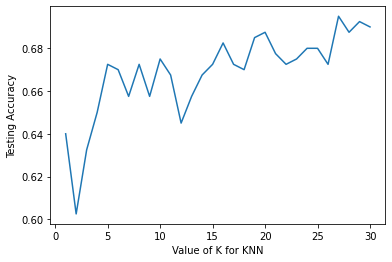

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [ ]:
scores_list.index(max(scores_list))+1 , max(scores_list)

(27, 0.695)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [ ]:
knn = KNeighborsClassifier(n_neighbors=scores_list.index(max(scores_list))+1)
knn.fit(X_train,y_train)
y_pred_knn =knn.predict(X_test)

cm = confusion_matrix(y_test,y_pred_knn)
precision = round(precision_score(y_test,y_pred_knn, average="macro")*100,2)
acc = round(accuracy_score(y_test,y_pred_knn)*100,2)
recall = round(recall_score(y_test,y_pred_knn, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred_knn, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc))

Konfusi Matrix
 [[81 11  0  0]
 [21 60 14  1]
 [ 1 32 58 15]
 [ 0  3 24 79]]
precision: 69.7
recall: 69.95
fscore: 69.63
accuracy: 69.5


#Inisialisasi Model Naive Bayes

### Eksekusi pada Model

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
probas = clf.predict_proba(X_test)[:,1]
y_pred

array([0, 0, 1, 0, 3, 1, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 1, 1, 1, 2, 3, 3,
       1, 2, 3, 2, 2, 2, 2, 2, 2, 1, 2, 0, 3, 3, 0, 0, 1, 0, 1, 0, 2, 1,
       0, 1, 3, 2, 2, 2, 2, 3, 1, 3, 2, 3, 2, 3, 3, 1, 0, 2, 1, 3, 1, 2,
       1, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 2, 2, 3, 2, 3, 0,
       2, 1, 3, 0, 1, 2, 1, 3, 3, 0, 2, 3, 3, 3, 0, 2, 2, 1, 1, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 0, 0, 1, 1, 0, 3,
       0, 3, 3, 0, 3, 2, 1, 1, 0, 0, 2, 1, 0, 3, 1, 1, 0, 1, 3, 3, 2, 1,
       0, 1, 1, 0, 3, 1, 3, 1, 3, 2, 3, 2, 2, 1, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 0, 2, 0, 3, 0, 0, 3, 3, 3, 1, 2, 2, 2, 3, 2, 3, 0, 1, 2, 3,
       3, 1, 3, 2, 0, 1, 2, 1, 2, 1, 0, 1, 1, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 1, 2, 3,
       2, 2, 0, 0, 2, 0, 3, 3, 3, 0, 2, 1, 0, 2, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 2, 0, 3, 2, 2, 1, 0, 1, 2, 3, 1, 1, 0, 2, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 2, 1,

### Save Model `Naive bayes`


In [ ]:
filenameNB = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/ModelNB7.pkl'
joblib.dump(clf,filenameNB)

['/content/gdrive/MyDrive/DataMining/TUGAS/Model/ModelNB7.pkl']

### Menghitung Probas

In [ ]:
probas

array([1.64207813e-01, 4.12608650e-01, 7.09271773e-01, 1.71113321e-01,
       1.20302798e-03, 8.07139242e-01, 5.37006021e-01, 5.52018908e-02,
       1.18282716e-01, 1.02680694e-05, 3.58510309e-02, 4.99493385e-05,
       5.76475353e-01, 7.03328708e-01, 8.97912869e-04, 4.84426663e-02,
       5.07410406e-01, 6.34407994e-01, 7.41384582e-01, 5.93454100e-02,
       4.34583312e-05, 5.53520675e-05, 7.44622738e-01, 1.38889141e-01,
       2.27346026e-05, 1.25876932e-01, 8.86211579e-02, 2.27895928e-02,
       3.67554284e-01, 1.15171608e-01, 3.36681406e-01, 6.24185507e-01,
       9.38181435e-03, 2.87689336e-02, 1.19280908e-05, 2.62594011e-03,
       2.34301662e-01, 1.65467614e-01, 7.79720004e-01, 3.32729762e-01,
       8.17402449e-01, 2.57257667e-01, 3.05518221e-02, 7.77276880e-01,
       5.25320680e-02, 8.03291720e-01, 1.15065513e-03, 1.69114969e-01,
       4.27924349e-01, 8.65403673e-02, 2.68351398e-01, 2.97189065e-04,
       7.21774978e-01, 1.07372144e-04, 2.42454200e-01, 3.24503752e-04,
      

### Menghitung Hasil Akhir

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
cm = confusion_matrix(y_test,y_pred)
precision = round(precision_score(y_test,y_pred, average="macro")*100,2)
acc_nb = round(accuracy_score(y_test,y_pred)*100,2)
recall = round(recall_score(y_test,y_pred, average="macro")*100,2)
f1score = round(f1_score(y_test, y_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm)
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(f1score))
print('accuracy: {}'.format(acc_nb))

Konfusi Matrix
 [[77 15  0  0]
 [12 65 19  0]
 [ 0 20 69 17]
 [ 0  0 23 83]]
precision: 74.17
recall: 73.7
fscore: 73.9
accuracy: 73.5


# Inisialisasi K-Means Clustering

### Eksekusi Pada Model

In [ ]:
from sklearn.cluster import KMeans

# #Try running from n=1 through 30 and record testing accuracy
n_range = range(1,31)
akurasi = {}
akurasi_score = []
for k in n_range:
        # install model
        kmeans = KMeans(n_clusters=k,random_state=0)
        kmeans.fit(X_train,y_train)
        # save model
        filenameKMeans = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/modelKMeans'+str(k)+'.pkl'
        joblib.dump(kmeans,filenameKMeans)
        y_pred=kmeans.predict(X_test)
        akurasi[k] = accuracy_score(y_test,y_pred)
        akurasi_score.append(accuracy_score(y_test,y_pred))
akurasi_score


[0.23,
 0.245,
 0.2375,
 0.25,
 0.2175,
 0.2425,
 0.1475,
 0.1225,
 0.155,
 0.1125,
 0.065,
 0.0725,
 0.025,
 0.0975,
 0.06,
 0.0625,
 0.045,
 0.065,
 0.0775,
 0.06,
 0.0725,
 0.025,
 0.0325,
 0.04,
 0.0325,
 0.0375,
 0.0375,
 0.04,
 0.0325,
 0.0675]

### Visualisasi Hasil K-means

Text(0, 0.5, 'Testing Accuracy')

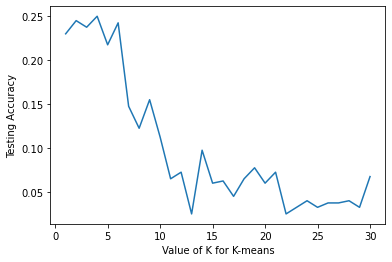

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

#plot the relationship between K and the testing accuracy
plt.plot(n_range,akurasi_score)
plt.xlabel('Value of K for K-means')
plt.ylabel('Testing Accuracy')

Nilai n dengan akurasi tertinggi

In [ ]:
akurasi_score.index(max(akurasi_score)) , max(akurasi_score)

(3, 0.25)

#Inisialisasi Decision three

Eksekusi pada model

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(max_depth =5, random_state = 42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=42)

Decision three rules text

In [ ]:
#import relevant functions
from sklearn.tree import export_text
#export the decision rules
tree_rules = export_text(dtc,
                        feature_names = list(nama_fitur))
#print the result
print(tree_rules)

|--- ram <= 0.53
|   |--- ram <= 0.23
|   |   |--- px_height <= 0.74
|   |   |   |--- ram <= 0.21
|   |   |   |   |--- battery_power <= 0.91
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- battery_power >  0.91
|   |   |   |   |   |--- class: 0
|   |   |   |--- ram >  0.21
|   |   |   |   |--- battery_power <= 0.33
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- battery_power >  0.33
|   |   |   |   |   |--- class: 1
|   |   |--- px_height >  0.74
|   |   |   |--- battery_power <= 0.48
|   |   |   |   |--- ram <= 0.15
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- ram >  0.15
|   |   |   |   |   |--- class: 1
|   |   |   |--- battery_power >  0.48
|   |   |   |   |--- class: 1
|   |--- ram >  0.23
|   |   |--- ram <= 0.33
|   |   |   |--- battery_power <= 0.41
|   |   |   |   |--- px_height <= 0.42
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- px_height >  0.42
|   |   |   |   |   |--- class: 1
|   |   |   |--- battery_power >  0.41
|   |   |   |   |--- p

Rules decision three plot diagram

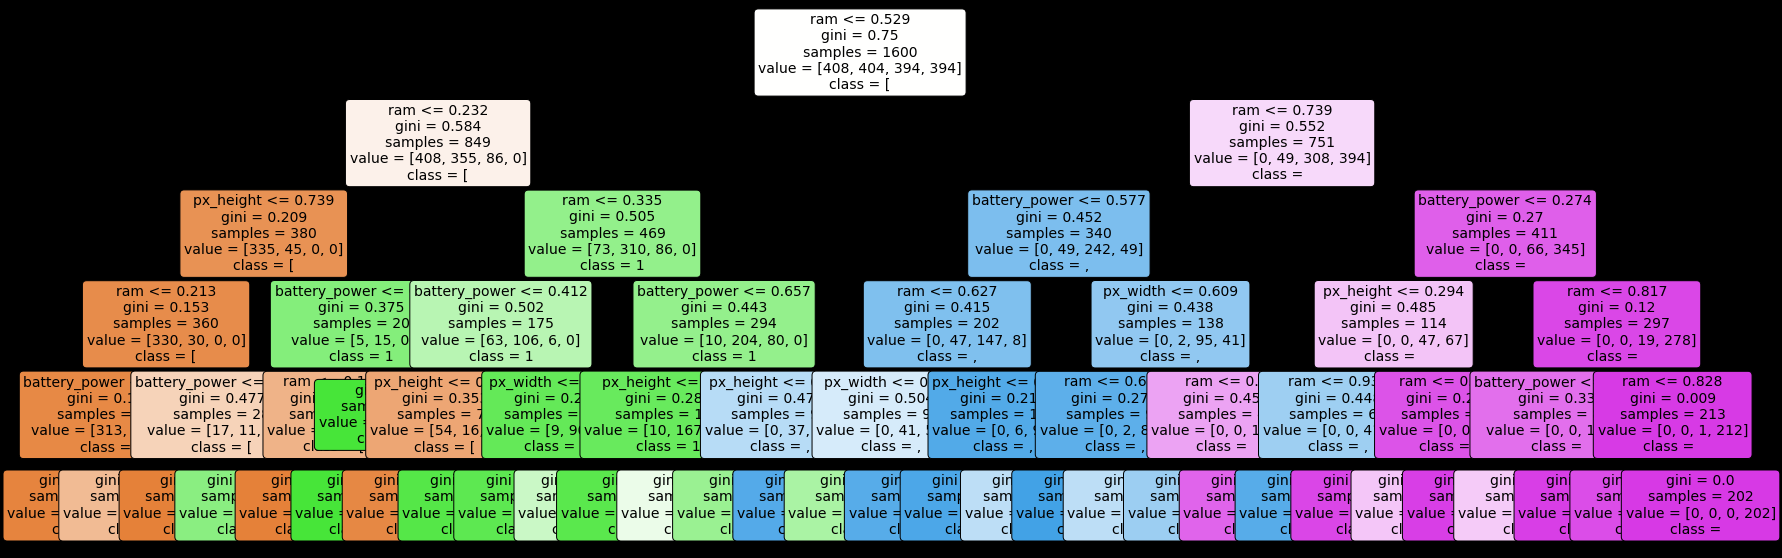

In [ ]:
#import relevant packages
from sklearn import tree
import matplotlib.pyplot as plt

#plt the figure, setting a black background
plt.figure(figsize=(30,10), facecolor ='k')
#create the tree plot
a = tree.plot_tree(dtc,feature_names = nama_fitur,class_names = str(y),rounded = True,filled = True,fontsize=14)
#show the plot
plt.show()


Hasil

In [ ]:
Sdtc_pred = dtc.predict(X_test)
Sdtc_pred

array([0, 1, 1, 0, 2, 2, 1, 2, 2, 3, 0, 3, 1, 1, 3, 0, 0, 1, 1, 2, 3, 3,
       1, 1, 3, 2, 2, 2, 2, 2, 2, 1, 3, 0, 3, 3, 0, 0, 1, 0, 1, 0, 3, 1,
       0, 1, 2, 1, 1, 2, 1, 2, 1, 3, 1, 3, 1, 3, 3, 2, 0, 2, 1, 3, 1, 1,
       0, 2, 3, 2, 1, 2, 0, 2, 3, 1, 2, 1, 0, 0, 0, 3, 1, 2, 3, 2, 3, 1,
       1, 1, 3, 0, 1, 1, 2, 3, 3, 0, 3, 3, 3, 3, 0, 1, 2, 0, 0, 1, 0, 2,
       0, 3, 1, 1, 2, 2, 3, 1, 1, 1, 2, 0, 0, 0, 3, 0, 1, 0, 1, 1, 0, 2,
       0, 3, 2, 0, 3, 2, 1, 1, 0, 0, 3, 1, 0, 2, 0, 1, 0, 1, 3, 3, 1, 1,
       0, 1, 1, 1, 3, 1, 3, 1, 3, 2, 3, 1, 2, 2, 3, 2, 2, 0, 2, 2, 0, 3,
       3, 0, 1, 3, 0, 3, 0, 0, 3, 3, 3, 1, 2, 1, 2, 3, 1, 3, 0, 1, 1, 3,
       3, 1, 3, 2, 0, 1, 2, 2, 2, 1, 0, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2, 1,
       0, 1, 2, 1, 3, 3, 1, 2, 2, 1, 1, 2, 3, 3, 2, 1, 0, 1, 2, 2, 3, 2,
       2, 1, 1, 1, 2, 0, 3, 3, 3, 0, 2, 1, 0, 1, 1, 3, 2, 0, 3, 1, 1, 1,
       2, 1, 3, 0, 3, 2, 2, 0, 0, 1, 2, 3, 0, 1, 1, 3, 3, 2, 1, 2, 2, 0,
       0, 3, 0, 0, 1, 3, 2, 3, 0, 0, 1, 3, 3, 3, 1,

In [ ]:
cm_dtc = confusion_matrix(y_test,Sdtc_pred)
precision_dtc = round(precision_score(y_test,Sdtc_pred, average="macro")*100,2)
acc_dtc = round(accuracy_score(y_test,Sdtc_pred)*100,2)
recall_dtc = round(recall_score(y_test,Sdtc_pred, average="macro")*100,2)
f1score_dtc = round(f1_score(y_test, Sdtc_pred, average="macro")*100,2)
print('Konfusi Matrix\n',cm_dtc)
print('precision: {}'.format(precision_dtc))
print('recall: {}'.format(recall_dtc))
print('fscore: {}'.format(f1score_dtc))
print('accuracy: {}'.format(acc_dtc))

Konfusi Matrix
 [[81 11  0  0]
 [ 6 86  4  0]
 [ 0 19 73 14]
 [ 0  0 14 92]]
precision: 83.56
recall: 83.32
fscore: 83.13
accuracy: 83.0


# Inisiaiisasi Model Random Forest

Mencari akurasi tertinggi dengan N_estimators dari 2 sampai 100

In [ ]:
from sklearn.ensemble import RandomForestClassifier
akurasirf= []
n_estimator = range(2,101)
for n in n_estimator:
  # inisialisasi model
  rf = RandomForestClassifier(
                          n_estimators=n,max_depth=2, random_state=40).fit(X_train, y_train)
  # predict x_test
  y_predrf = rf.predict(X_test)
  # akurasi count
  akurasirf.append(accuracy_score(y_test,y_predrf))

In [ ]:
rf = RandomForestClassifier(
                          n_estimators=13,max_depth=2, random_state=40).fit(X_train, y_train)
filenameRF = '/content/gdrive/MyDrive/DataMining/TUGAS/Model/randomforest.pkl'
joblib.dump(rf,filenameRF)

['/content/gdrive/MyDrive/DataMining/TUGAS/Model/randomforest.pkl']

Visualisasi Hasil Akurasi 

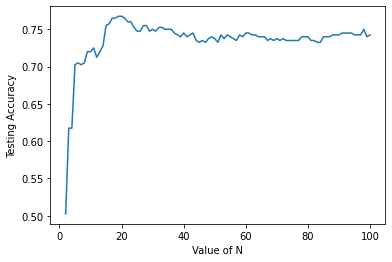

In [ ]:
plt.plot(n_estimator,akurasirf)
plt.xlabel('Value of N')
plt.ylabel('Testing Accuracy')
plt.show()

Mencari Akurasi Tertinggi dari N

In [ ]:
akurasirf.index(max(akurasirf))+1 , max(akurasirf)

(18, 0.7675)